In [126]:
import numpy as np
import os

# preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import rgb_to_grayscale


# Reshaping 
from tensorflow import reshape
from tensorflow.image import resize_with_pad

### Load Train Data From the Current Directory

In [127]:
# Get current working directory
PATH = os.getcwd() + '/../../src/data/chest_xray/'


# importing training normal data
norm_train_path = PATH+'train/NORMAL/'
norm_train_batch = os.listdir(norm_train_path) 

norm_train = []
norm_errors = []
for image_name in (norm_train_batch[:10]): 
    img_path = norm_train_path + image_name 
    try:
        x = image.load_img(img_path) 
        # preprocessing if required 
        norm_train.append(x) 
    except:
        norm_errors.append(image_name)
    
    
# importing training pnuemonia data
pnue_train_path = PATH + 'train/PNEUMONIA/'
pnue_train_batch = os.listdir(pnue_train_path)

pnue_train = []
pnue_errors = []
for image_name in pnue_train_batch[:10]:
    img_path = pnue_train_path + image_name
    try:
        x = image.load_img(img_path)
        pnue_train.append(x)
    except:
        pnue_errors.append(image_name)
    


# Define an import function

In [138]:
def import_image(PATH, image_name):
    """
    PATH --> str: Relative path to image directoy
    image_name --> str: Name of the image to load
    
    Returns:
    PIL image
    
    """
    
    # create path to file
    img_path = PATH + "/" + image_name
    
    # load file and return pil
    return image.load_img(img_path) 

def grayscale_and_resize(PIL, shape=(255,256), padding=False):
    """
    This is the preprocessing function that will take the raw jpeg, gray scale it, resize it and 
    turn it into an array
    
    
    PIL --> PIL object
    shape --> tuple: size of the final array
    padding --> bool: if True, will use tf.resize_with_pad
    """
    if padding:
        gray_image = rgb_to_grayscale(PIL)
        resized_image_arr = resize_with_pad(gray_image, target_height=shape[0], target_width=shape[1])
    else:
        resized_image_arr = img_to_array(PIL.convert(mode = 'L').resize(shape))
    
    return resized_image_arr


def import_image_to_array(RELPATH,
         dir_names = ['train', 'test', 'val'],
         sub_dir_names = ['NORMAL', 'PNEUMONIA'],
         padding=False,
         shape=(256,256), test=False):
    """
    This function loads all train, test and validation data into a dictionary of images
    =====================================================================================
    RELPATH --> str: The relative path to the cwd to the directory containing image directories
    eg '../../src/data/chest_xray'
    =====================================================================================
    dir_names --> list, str: The names of the subdirectories containing the images
    eg ['train', 'test', 'val'] <-- default
    =====================================================================================
    sub_dir_names --> list -> str: names of the subdirectory containg postivie and negative cases
    
    =====================================================================================
    padding  --> bool: Whether you want the reshaping to be padded to or not
    
    =====================================================================================
    shape --> tuple-> int: The final shape of the tensor array
    
    returns
    
    dict --> str:list -> tuple -> (tf.array, bool)
    A dictionary where the keys are the dir_names and the values are lists containing tuple where 
    the first index is the tf.array and the second is a boolian, True if class is pnuemonia, false otherwise.
    """
    # test relative path works!! 
    PATH = os.getcwd() + RELPATH
    
    try:
        os.listdir(PATH)
        print("You're relative directory is good, proceeding to import files...", end="\n\n")
    except Exception as e:
        print(str(e))
        print(f"Your relative path directory is not pointing to the correct location. Double check your input \n")
        print("Terminating Program", end='\n')
        print("=======================================================================================")
        return False
    # instantiate a dict object and populate the keys
    image_dict = {}
    for name in dir_names:
        image_dict[name] = []
        
        print(f"Loading images from {name}", end='\n')
        
        
        # For each subdirectory, get all of the images and append to dictionary
        for sub_dir in sub_dir_names:
            subPATH = PATH + name + "/" + sub_dir
            # list of all image names in the subdirectory
            image_batch = os.listdir(subPATH)
            
            for image in image_batch:
                # import the image in pil format
                pil = import_image(subPATH, image)
                # gray scale and reshape the image turning it into an array
                gray_resized_pil = grayscale_and_resize(pil, shape=shape, padding=padding)
                
                # center the pixels
                centered_array = gray_resized_pil/255
                
                # append to the image_dict
                flag = True
                if sub_dir == 'NORMAL':
                    flag = False
                
                image_dict[name].append((centered_array, flag))
                
            
                # if this is just a test case, break out of this loop so we get one from each class
                if test == True:
                    break
            
            print(f"Finished loading images from {sub_dir}", end="\n")

        print()
    
    return image_dict               

In [140]:
import_image_to_array('/../../src/data/chest_xray/',test=False)

You're relative directory is good, proceeding to import files...

Loading images from train
Finished loading images from NORMAL
Finished loading images from PNEUMONIA

Loading images from test
Finished loading images from NORMAL
Finished loading images from PNEUMONIA

Loading images from val
Finished loading images from NORMAL
Finished loading images from PNEUMONIA



{'train': [(array([[[0.09411765],
           [0.10980392],
           [0.10980392],
           ...,
           [0.10980392],
           [0.11372549],
           [0.03137255]],
   
          [[0.09019608],
           [0.10980392],
           [0.10980392],
           ...,
           [0.10980392],
           [0.10588235],
           [0.03137255]],
   
          [[0.09019608],
           [0.10980392],
           [0.10980392],
           ...,
           [0.10980392],
           [0.10588235],
           [0.02745098]],
   
          ...,
   
          [[0.        ],
           [0.        ],
           [0.        ],
           ...,
           [0.        ],
           [0.        ],
           [0.        ]],
   
          [[0.        ],
           [0.        ],
           [0.        ],
           ...,
           [0.        ],
           [0.        ],
           [0.        ]],
   
          [[0.        ],
           [0.        ],
           [0.        ],
           ...,
           [0.        ],
 

In [103]:
image_batch = os.listdir("/Users/TjH/Flatiron/phase-4-project/Pnuemonia-image-classification/notebooks/EDA/../../src/data/chest_xray/train/NORMAL")

# Convert image to grayscale

In [77]:
# convert image to array
image_array = img_to_array(pnue_train[0])

# image to grayscale
gray_scale_arr = rgb_to_grayscale(image_array)

# Resize image
resize_with_pad(gray_scale_arr, target_height=256, target_width=256)/255

<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [32]:
(image_array[:,:,1] - image_array[:,:,2]).any()

False

In [43]:
rgb_to_grayscale(image_array).shape

TensorShape([736, 1048, 1])

In [45]:
image_array.shape

(736, 1048, 3)

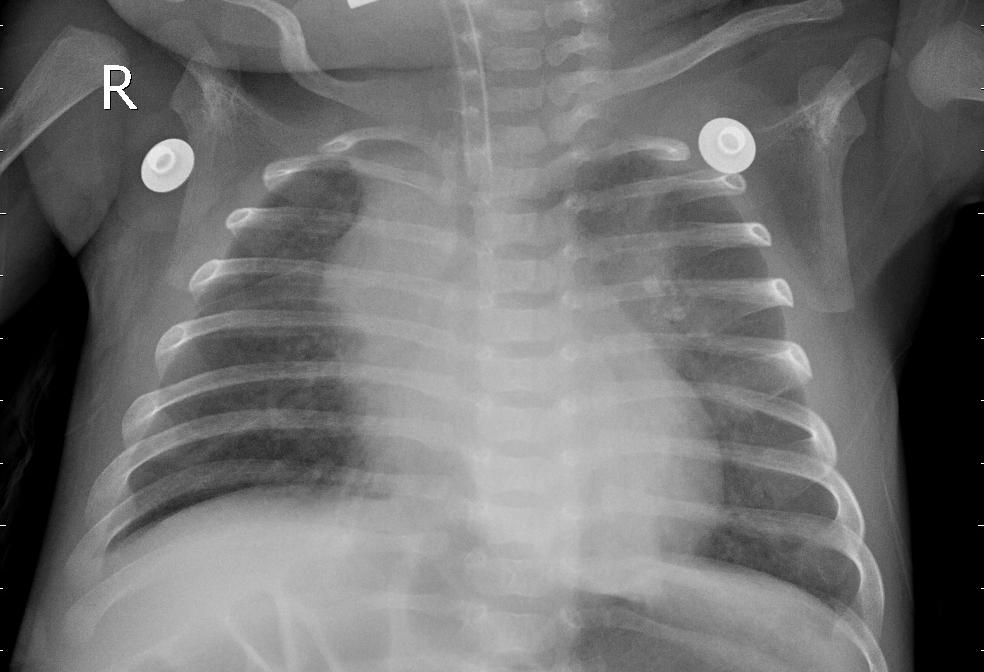

In [63]:
pnue_train[1]